In [17]:
import copy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import progressbar
import time
np.random.seed(0)

In [5]:
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(3, activation='linear'))
model.compile(loss='mse', optimizer=Adam(lr=0.001))

In [16]:
model.predict(np.asarray([[1,2]]))

array([[-0.18110307,  0.7617515 ,  0.2344844 ]], dtype=float32)

In [18]:
sequential_input = np.asarray([[1,2]])

In [19]:
def getParallelInput(n):
    x = []
    for _ in range(n):
        x.append([1,2])
    return np.asarray(x)

In [27]:
bar = progressbar.ProgressBar()
parallel_results = []
sequential_results = []
for n in bar(range(1,300)):
    time_1 = time.time()
    for _ in range(n):
        model.predict(np.asarray([[1, 2]]))
    time_2 = time.time()
    sequential_results.append(time_2 - time_1)
    parallel_input_n = getParallelInput(n)
    time_1 = time.time()
    model.predict(parallel_input_n)
    time_2 = time.time()
    parallel_results.append(time_2 - time_1)

100% (299 of 299) |######################| Elapsed Time: 0:00:18 Time:  0:00:18


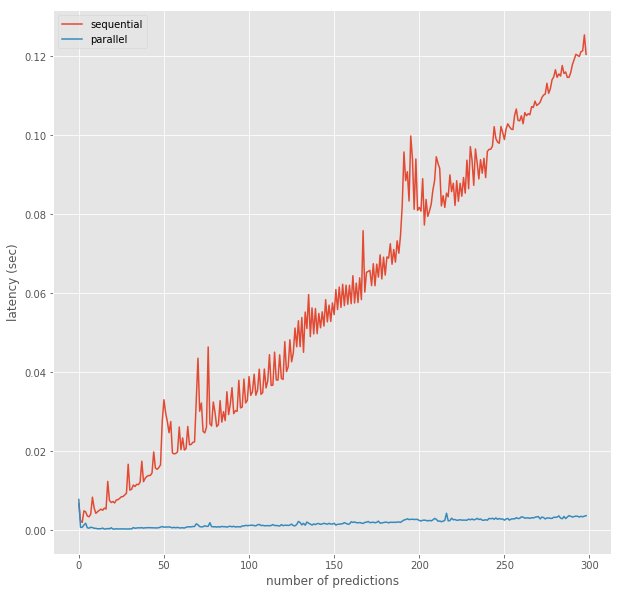

In [32]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(10,10))
ax.set_ylabel('latency (sec)')
ax.set_xlabel('number of predictions')
ax.plot(sequential_results, label='sequential')
ax.plot(parallel_results, label='parallel')
plt.legend()
plt.savefig('predict_latency.png')
plt.show()